# <center>Project-Based Assignment CLO-2</center>

<b>Topik</b>
Implementation of Supervised Learning on Regression Task

<b>Anggota Kelompok</b>
1. Tsania Millatina Aghnia Fariha - 1301210051
2. Putri Ayu Sedyo Mukti - 1301213453
3. Daffa Akbar Aryaditya - 1301210105

#### Latar Belakang


---
<p align = 'justify'>
Abalone adalah salah satu jenis seafood yang populer saat ini dan memiliki nilai jual tinggi, terutama di negara-negara Asia. Semakin tua usia Abalon, maka harganya pun semakin tinggi. Oleh karena itu,  usia Abalon untuk menentukan harga dari jual beli agar penjual tidak mengalami kerugian dan pembeli tidak mengalami pipenipuan. Berd asarkan hasil penelitian, umur abalone dapat ditentukan dengan menghitung jumlah ring di dalam tubuh abalone dan menambahkannya dengan 1.5. Namun,proses penentuan usia ini rumit karena melibatkan pengukuran jumlah lapisan kerang ("ring") yang membentuk cangkang abalon yang dilakukan dengan mengambil sampel cangkang, pewarnaan, dan menghitung jumlah cincin di bawah mikroskop. Proses tersebut kurang efisien karena  memakan waktu dan memerlukan ketelitian yang tinggi. Oleh karena itu, dalam laporan ini kami memiliki tujuan untuk memprediksi umur abalone berdasarkan beberapa karakteristik pada hewan tersebut  tanpa harus mengukur jumlah lapisan kerang(ring). Berikut merupakan deskripsi dataset yang kami miliki.

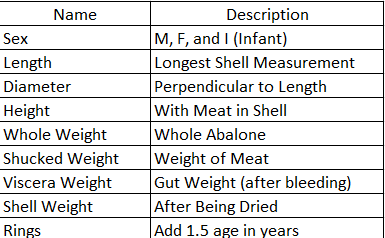

#### Fitur -fitur data set Abalone :
----



*   Sex             : female,male, dan infant
*   Length          : Panjang Cangkang
*   Diameter        : lebar dari cangkang
*   Height	        : besar daging abalon di dalam cangkang
*   Whole weight    : Total bobot abalon
*   Shucked weight  : Berat daging
*   Viscera weight  : Berat isi perut (setelah dipotong)
*   Shell weight	  : berat daging Setelah dikeringkan
*   Rings           : Jumlah lapisan kerang














# Import Modul

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics.pairwise import linear_kernel
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import skew
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

Mengimpor library yang akan digunakan dalam analisis dan pemodelan

# Membaca Data

In [ ]:
column_names = ["Sex", "Length", "Diameter", "Height", "Wholeweight", "Shuckedweight", "Visceraweight", "Shellweight", "Rings"]

In [ ]:
Data = pd.read_csv('abalone.data', names = column_names)

# Memahami Data

In [ ]:
Data.head()

,Sex,Length,Diameter,Height,Wholeweight,Shuckedweight,Visceraweight,Shellweight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Menampilkan beberapa baris pertama dari data set Abalone

In [ ]:
print("Jumlah Baris : ", Data.shape[0])
print("Jumlah Kolom : ", Data.shape[1])

Jumlah Baris :  4177
Jumlah Kolom :  9


Menampilkan banyak fitur dan banyak data di data set Abalon

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            4177 non-null   object 
 1   Length         4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   Wholeweight    4177 non-null   float64
 5   Shuckedweight  4177 non-null   float64
 6   Visceraweight  4177 non-null   float64
 7   Shellweight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Mengecek data set abalon apakah ada data yang kosong atau tidak dan mengecek tipe datanya. Kemudian di infokan bahwa tidak ada data yang kosong

In [ ]:
Data.describe()

,Length,Diameter,Height,Wholeweight,Shuckedweight,Visceraweight,Shellweight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Analisi :
Seperti yang kita bisa lihat pada kolom Height nilai minimumnya adalah 0, karena itu tidak mungkin maka kami akan menghilangkannya.

# Data Preprocessing dan Explorasi Data

In [ ]:
Data[Data['Height']==0]

,Sex,Length,Diameter,Height,Wholeweight,Shuckedweight,Visceraweight,Shellweight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


Menghilangkan nilai 0 dalam Height.

In [ ]:
Data.drop(index=[1257,3996], inplace = True)
Data.shape

(4175, 9)

Membuat age dari rings+1.5

In [ ]:
Data['Age'] = Data['Rings']+1.5 #seperti deskripsi
Data.drop('Rings', axis = 1, inplace = True)
Data.head()

,Sex,Length,Diameter,Height,Wholeweight,Shuckedweight,Visceraweight,Shellweight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [ ]:
Data.isna().mean().to_frame(name='% of missing values')

,% of missing values
Sex,0.0
Length,0.0
Diameter,0.0
Height,0.0
Wholeweight,0.0
Shuckedweight,0.0
Visceraweight,0.0
Shellweight,0.0
Age,0.0


Menghitung missing values

In [ ]:
Data.duplicated().sum()

0

Menghitung duplicated data

In [ ]:
nf = Data.select_dtypes(include=[np.number]).columns
cf = Data.select_dtypes(include=[np.object]).columns

membagi menjadi 2 kategori. pertama nf dimana baris ini mencari kolom-kolom dalam data set Abalo yang memiliki tipe data numeric. Kedua cf dimana baris ini mencari kolom-kolom dalam data set Abalone yang memiliki tipe data objek

In [ ]:
nf

Index(['Length', 'Diameter', 'Height', 'Wholeweight', 'Shuckedweight',
       'Visceraweight', 'Shellweight', 'Age'],
      dtype='object')

In [ ]:
cf

Index(['Sex'], dtype='object')

(-0.5, 2.5, 0.0, 30.0)

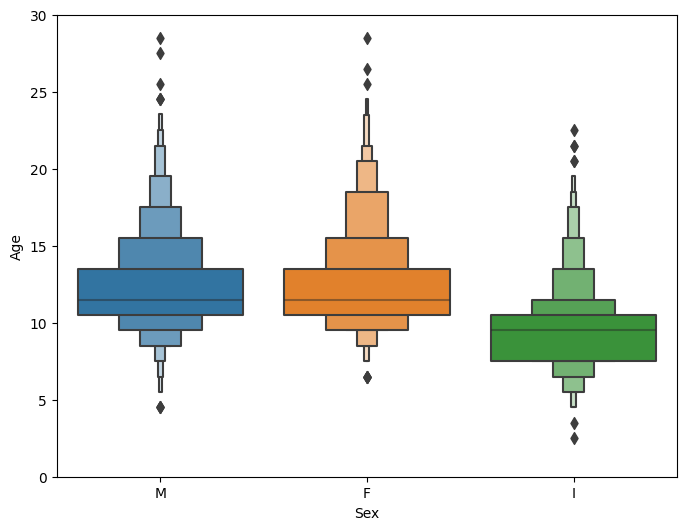

In [ ]:
#categorical features
temp = pd.concat([Data['Age'], Data['Sex']], axis=1)

f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxenplot(x='Sex', y="Age", data=Data)
fig.axis(ymin=0, ymax=30)

Analisi:
Tidak ada perbedaan pada umur dari male dan female, namun infants ada perbedaan sekitar 5-10.

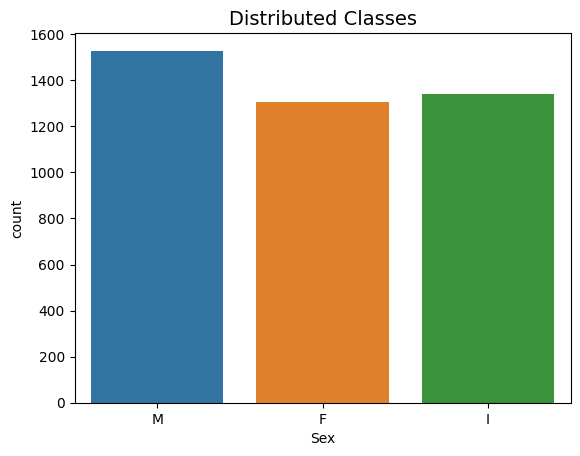

In [ ]:
sns.countplot(x='Sex', data = Data)
plt.title('Distributed Classes', fontsize=14)
plt.show()

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Wholeweight'}>],
       [<Axes: title={'center': 'Shuckedweight'}>,
        <Axes: title={'center': 'Visceraweight'}>,
        <Axes: title={'center': 'Shellweight'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

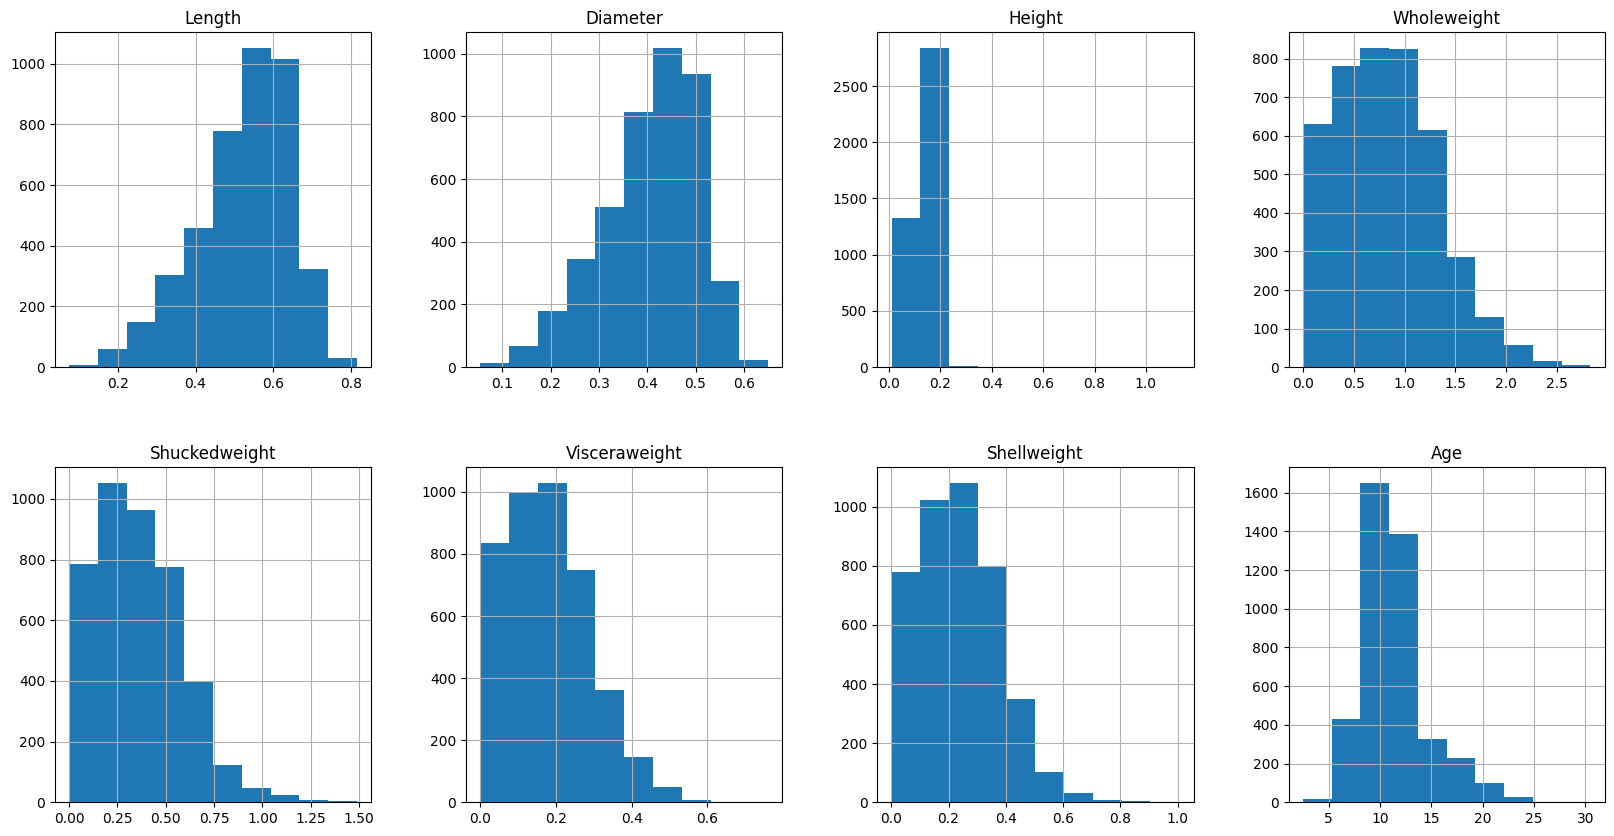

In [ ]:
Data.hist(figsize = (20,10), layout = (2,4))

Analisis:
Skewness dari Height terlalu besar, maka diperlukan normalisasi.

In [ ]:
Data.skew().sort_values(ascending = False)

Height           3.166364
Age              1.113754
Shuckedweight    0.718735
Shellweight      0.621081
Visceraweight    0.591455
Wholeweight      0.530549
Diameter        -0.610182
Length          -0.640993
dtype: float64

Analisis:
Skewness yang mendekati 0 biasanya menunjukkan distribusi normal pada kurva. Dapat kita lihat diatas Height memiliki skewness tertinggi sebesar 3.17. Kemungkinan terdapat pencilan (outliers) pada Height, sehingga diperlukan pemeriksaan dan penghapusan sebelum dilakukan pemodelan. Maka kami akan memeriksa kolerasi dengan variabel dependen yaitu Age.

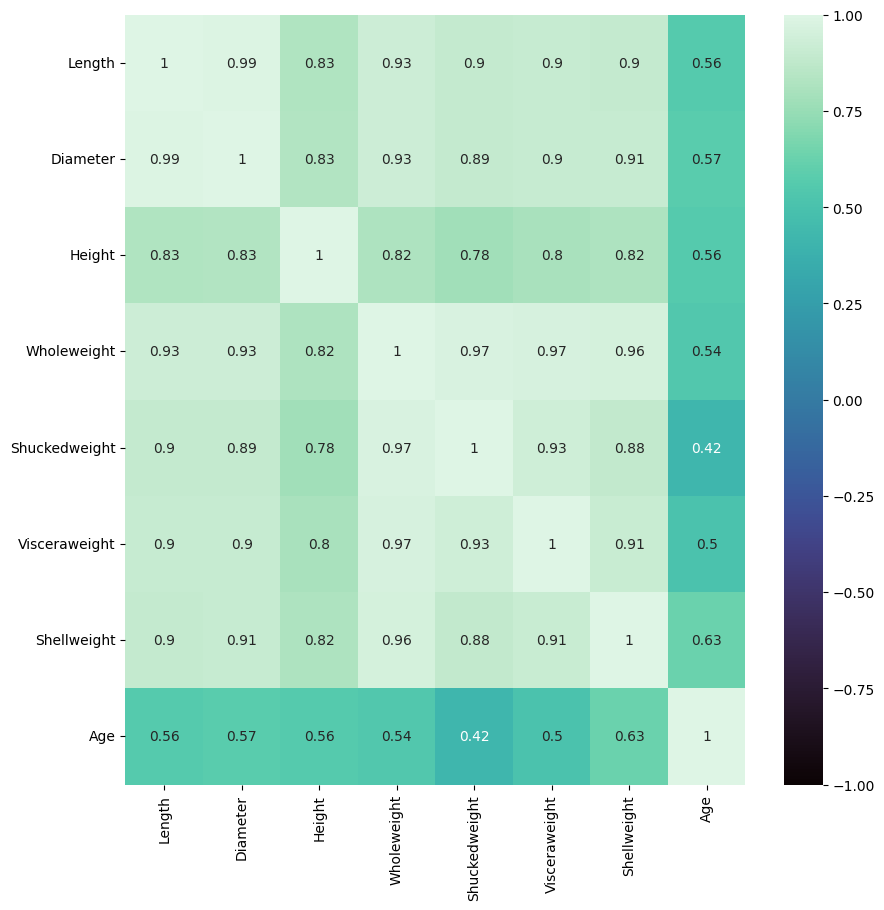

In [ ]:
corr = Data.corr()
plt.figure(figsize = (10,10))
ax = sns.heatmap(corr, vmin = -1, center = 0, annot = True, cmap = 'mako')

Analisi: Tidak ada kolerasi negatif ditemukan, dapat kita lihat kolerasi antara Length dan Diameter cukup tinggi, kolerasi juga tinggi antara Shuckedweight, Visceraweight Vs Wholeweight & Shellweight vs Wholeweight.

# Menghitung VIF

In [ ]:
def vif_arr(df1):
    vif = pd.DataFrame()
    df1 = sm.add_constant(df1)
    vif["Features"] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    return vif

In [ ]:
temp = Data.drop('Sex', axis=1)  # Assuming 'Sex' is a categorical variable
result = vif_arr(temp).sort_values(by='Features', ascending=False)
print(result)

        Features         VIF
0          const   65.826699
4    Wholeweight  115.321089
6  Visceraweight   17.622607
5  Shuckedweight   32.677153
7    Shellweight   22.151151
1         Length   40.747758
3         Height    3.630903
2       Diameter   42.195176
8            Age    2.116796


Multicollinearity terjadi ketika variabel independen dalam model regresi memiliki korelasi tinggi.

In [ ]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
columns_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)] #highly correlated variables to be removed.

print("Columns to drop:\n", columns_to_drop)

Columns to drop:
 ['Diameter', 'Shuckedweight', 'Visceraweight', 'Shellweight']


Kita akan menghilangkan kolom tersebut.

In [ ]:
Data.drop(columns_to_drop, axis=1, inplace = True)

In [ ]:
Data.head()

,Sex,Length,Height,Wholeweight,Age
0,M,0.455,0.095,0.5140,16.5
1,M,0.350,0.090,0.2255,8.5
2,F,0.530,0.135,0.6770,10.5
3,M,0.440,0.125,0.5160,11.5
4,I,0.330,0.080,0.2050,8.5


Text(0.5, 1.0, 'Height vs Sex')

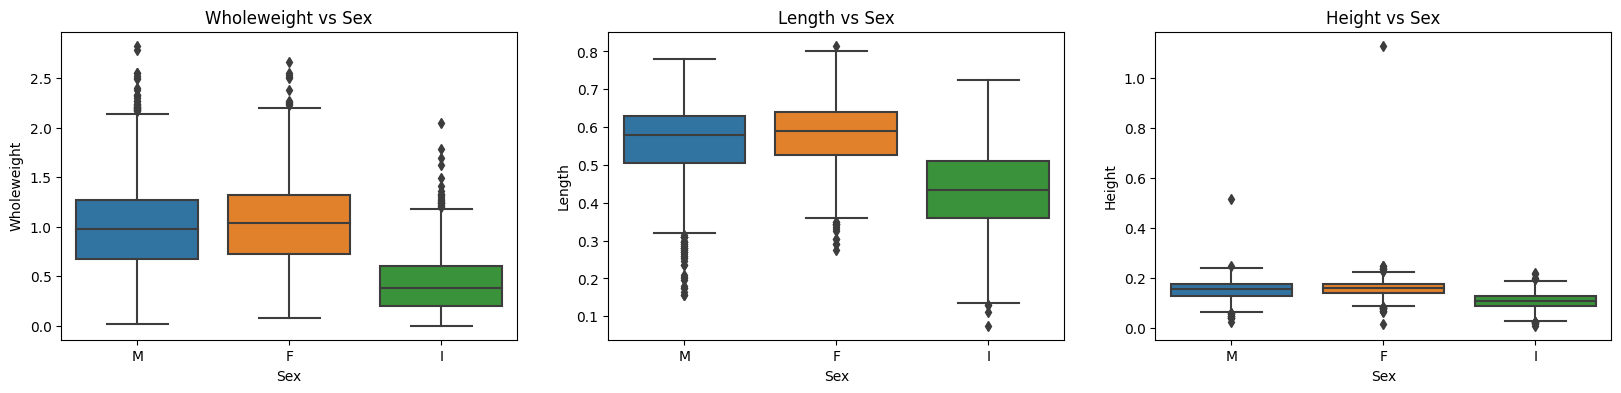

In [ ]:
f, axes = plt.subplots(ncols = 3, figsize = (20,4))

sns.boxplot(x = 'Sex', y = 'Wholeweight', data = Data, ax = axes[0])
axes[0].set_title('Wholeweight vs Sex')

sns.boxplot(x = 'Sex', y = 'Length', data = Data, ax = axes[1])
axes[1].set_title('Length vs Sex')

sns.boxplot(x = 'Sex', y = 'Height', data = Data, ax = axes[2])
axes[2].set_title('Height vs Sex')

Kami akan melakukan normalisasi pada variabel tinggi badan (Height) dengan melakukan square root transformation

In [ ]:
Data['Height'] = np.sqrt(Data['Height'])

In [ ]:
Data.skew().sort_values(ascending = False)

Age            1.113754
Wholeweight    0.530549
Height        -0.176012
Length        -0.640993
dtype: float64

Seluruh variabel independen mendekati 0 sekarang.

# Membuat histogram fitur numerik

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Wholeweight'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

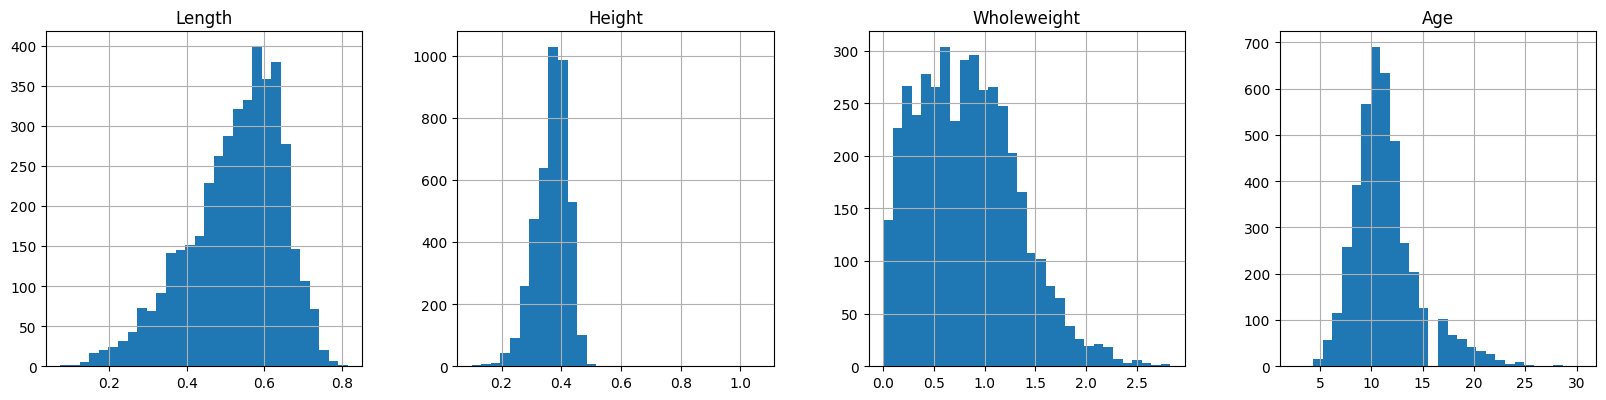

In [ ]:
Data.hist(figsize = (20,10), layout = (2,4), bins = 30)

Analisi: Bisa kita lihat sekarang distribusi pada Height normal.

# Mengubah Fitur Kategorikal

In [ ]:
# Melakukan one-hot encoding untuk kolom "Sex"
Data = pd.get_dummies(Data, columns=['Sex'], prefix='Sex', drop_first=False)

print(Data.columns)


Index(['Length', 'Height', 'Wholeweight', 'Age', 'Sex_F', 'Sex_I', 'Sex_M'], dtype='object')


# Membersihkan Data Dari Pencilan

In [ ]:
Q1 = Data.quantile(0.25)
Q3 = Data.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((Data < (Q1 - 1.5 * IQR)) | (Data > (Q3 + 1.5 * IQR))).any(axis=1)

outliers_data = Data[outliers_iqr]

print("Data pada baris dengan pencilan:")
print(outliers_data)


Data pada baris dengan pencilan:
      Length    Height  Wholeweight   Age  Sex_F  Sex_I  Sex_M
6      0.530  0.387298       0.7775  21.5      1      0      0
7      0.545  0.353553       0.7680  17.5      1      0      0
9      0.550  0.387298       0.8945  20.5      1      0      0
32     0.665  0.406202       1.3380  19.5      0      0      1
33     0.680  0.418330       1.7980  20.5      1      0      0
...      ...       ...          ...   ...    ...    ...    ...
3947   0.475  0.374166       0.6175  17.5      0      0      1
3993   0.720  0.484768       2.2385  13.5      0      0      1
3994   0.185  0.212132       0.0320   5.5      0      1      0
3995   0.245  0.234521       0.0785   6.5      0      1      0
4119   0.300  0.223607       0.1185   5.5      0      1      0

[383 rows x 7 columns]


In [ ]:
Data = Data[~outliers_iqr]


In [ ]:
Data.head()

,Length,Height,Wholeweight,Age,Sex_F,Sex_I,Sex_M
0,0.455,0.308221,0.5140,16.5,0,0,1
1,0.350,0.300000,0.2255,8.5,0,0,1
2,0.530,0.367423,0.6770,10.5,1,0,0
3,0.440,0.353553,0.5160,11.5,0,0,1
4,0.330,0.282843,0.2050,8.5,0,1,0


#### Ringkasan Metode
<p align = 'justify'>
Pertama yang kami lakukan untuk membuat Machine Learning adalah dengan memisahkan train-test, dimana target prediksi kami adalah Age. Kemudian, membuat model Baseline dan membuat 3 buah eksplorasi model SVM .Pertama, kami membuat model SVM dengan RBF Kernel. Kedua, kami membuat model SVM dengan Linear Kernel. Ketiga, kami membuat model SVM dengan Precomputed Kernel.

# Memisahkan Data Menjadi Data train dan Data test

In [ ]:
# Split data menjadi data train dan data test
X = Data.drop('Age', axis=1)
y = Data['Age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Melakukan Standardisasi

In [ ]:
# Standardisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Pembangunan Model Baseline

In [ ]:
# Model Baseline
baseline_model = svm.SVR()
baseline_model.fit(X_train_scaled, y_train)

# Prediksi pada data test
y_pred_baseline = baseline_model.predict(X_test_scaled)

# Evaluasi Model Baseline
print("Baseline Model:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_baseline))
print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_test, y_pred_baseline))
print("R2 Score:", r2_score(y_test, y_pred_baseline))

Baseline Model:
Mean Squared Error (MSE): 3.183280719132187
Mean Absolute Percentage Error (MAPE): 0.12045612826291115
R2 Score: 0.4288148756454814


# Eksplorasi Model

In [ ]:
#Scheme 1 Menggunakan kernel rbf
# Membuat model SVM dengan RBF Kernel
rbf_svr = SVR(kernel='rbf')

# Definisi parameter grid untuk dicari dengan GridSearchCV
param_grid_rbf = {'C': [0.1, 1, 10, 100], 'epsilon': [0.1, 0.2, 0.5], 'gamma': [0.001, 0.01, 0.1, 1, 'scale']}

# Membuat scorer berdasarkan r2_score
scorer_rbf = make_scorer(r2_score)

# Melakukan Grid Search untuk mencari parameter terbaik
grid_search_rbf = GridSearchCV(rbf_svr, param_grid_rbf, scoring=scorer_rbf, cv=5)
grid_search_rbf.fit(X_train_scaled, y_train)

# Mendapatkan model terbaik dari hasil Grid Search
best_rbf_svr = grid_search_rbf.best_estimator_

# Prediksi pada data test
y_pred_best_rbf_svr = best_rbf_svr.predict(X_test_scaled)

In [ ]:
#Scheme 2 Menggunakan kernel linear
# Membuat model SVM dengan Linear Kernel
linear_svr = SVR(kernel='linear')

# Definisi parameter grid untuk dicari dengan GridSearchCV
param_grid_linear = {'epsilon': [0.1, 0.2, 0.5]}

# Membuat scorer berdasarkan r2_score
scorer_linear = make_scorer(r2_score)

# Melakukan Grid Search untuk mencari parameter terbaik
grid_search_linear = GridSearchCV(linear_svr, param_grid_linear, scoring=scorer_linear, cv=5)
grid_search_linear.fit(X_train_scaled, y_train)

# Mendapatkan model terbaik dari hasil Grid Search
best_linear_svr = grid_search_linear.best_estimator_

# Prediksi pada data test
y_pred_best_linear_svr = best_linear_svr.predict(X_test_scaled)

In [ ]:
#Scheme 3 Menggunakan kernel precomputed
# Membuat model SVM dengan Precomputed Kernel
precomputed_svr = SVR(kernel=linear_kernel)

# Definisi parameter grid untuk dicari dengan GridSearchCV
param_grid_precomputed = {'epsilon': [0.1, 0.2, 0.5]}

# Membuat scorer berdasarkan r2_score
scorer_precomputed = make_scorer(r2_score)

# Melakukan Grid Search untuk mencari parameter terbaik
grid_search_precomputed = GridSearchCV(precomputed_svr, param_grid_precomputed, scoring=scorer_precomputed, cv=5)
grid_search_precomputed.fit(X_train_scaled, y_train)

# Mendapatkan model terbaik dari hasil Grid Search
best_precomputed_svr = grid_search_precomputed.best_estimator_

# Prediksi pada data test
y_pred_best_precomputed_svr = best_precomputed_svr.predict(X_test_scaled)

# Evaluasi

In [ ]:
# Scheme 1 evaluasi Model SVM dengan RBF Kernel yang telah dioptimalkan
print("Model SVM dengan RBF Kernel (Optimized):")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_best_rbf_svr))
print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_test, y_pred_best_rbf_svr))
print("R2 Score:", r2_score(y_test, y_pred_best_rbf_svr))

Model SVM dengan RBF Kernel (Optimized):
Mean Squared Error (MSE): 3.1283757548815747
Mean Absolute Percentage Error (MAPE): 0.12041305305489466
R2 Score: 0.4386666297319748


In [ ]:
# Scheme 2 evaluasi Model SVM dengan Linear Kernel yang telah dioptimalkan
print("Model SVM dengan Linear Kernel (Optimized):")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_best_linear_svr))
print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_test, y_pred_best_linear_svr))
print("R2 Score:", r2_score(y_test, y_pred_best_linear_svr))

Model SVM dengan Linear Kernel (Optimized):
Mean Squared Error (MSE): 3.348470115363219
Mean Absolute Percentage Error (MAPE): 0.12233250017670923
R2 Score: 0.3991744718755016


In [ ]:
# Scheme 3 evaluasi Model SVM dengan Precomputed Kernel yang telah dioptimalkan
print("Model SVM dengan Precomputed Kernel (Optimized):")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_best_precomputed_svr))
print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_test, y_pred_best_precomputed_svr))
print("R2 Score:", r2_score(y_test, y_pred_best_precomputed_svr))

Model SVM dengan Precomputed Kernel (Optimized):
Mean Squared Error (MSE): 3.3484701153632446
Mean Absolute Percentage Error (MAPE): 0.12233250017671024
R2 Score: 0.39917447187549693


# Hasil dan Analisis
<p align = 'justify'>
Dari hasil eksplorasi diatas didapatkan hasil sebagai berikut.

Baseline
Mean Squared Error (MSE): 3.18
Mean Absolute Percentage Error (MAPE): 0.12
R2 Score: 0.43

1.  Model SVM dengan RBF Kernel

*   Mean Squared Error (MSE): 3.13
*   Mean Absolute Percentage Error (MAPE): 0.12
*   R2 Score: 0.44
<p align = 'justify'>
Analisis:
Model SVM dengan RBF Kernel menghasilkan kinerja yang sedikit lebih baik dibandingkan dengan baseline model. MSE yang lebih rendah menunjukkan bahwa model ini memiliki tingkat kesalahan prediksi yang lebih rendah, dan R2 Score yang lebih tinggi menandakan bahwa model ini lebih baik dalam menjelaskan variasi dalam data.

2.  Model SVM dengan Linear Kernel

*   Mean Squared Error (MSE): 3.35
*   Mean Absolute Percentage Error (MAPE): 0.12
*   R2 Score: 0.40
<p align = 'justify'>
Analisis:
Model SVM dengan Linear Kernel memiliki performa yang sedikit lebih buruk dibandingkan dengan baseline model. MSE yang lebih tinggi menunjukkan tingkat kesalahan prediksi yang lebih tinggi, dan R2 Score yang lebih rendah menandakan bahwa model ini tidak sebaik baseline dalam menjelaskan variasi dalam data.

3.  Model SVM dengan Precomputed Kernel

*   Mean Squared Error (MSE): 3.35
*   Mean Absolute Percentage Error (MAPE): 0.12
*   R2 Score: 0.40

<p align = 'justify'>
Analisis:
Model SVM dengan Precomputed Kernel memiliki performa yang sebanding dengan model SVM dengan Linear Kernel. Meskipun metrik kesalahan prediksi dan R2 Score sama, pemilihan kernel precomputed mungkin tidak memberikan manfaat tambahan yang signifikan.
<p align = 'justify'>
Kesimpulan Analisis:
Model SVM dengan RBF Kernel menunjukkan peningkatan dalam prediksi dibandingkan dengan baseline.
Model SVM dengan Linear Kernel memiliki kinerja yang kurang baik dibandingkan dengan baseline.
Model SVM dengan Precomputed Kernel tidak memberikan perbedaan yang signifikan dalam kinerja dibandingkan dengan model SVM dengan Linear Kernel.

# Kesimpulan
<p align = 'justify'>
Dalam dataset abalon ini kami melakukan eksplorasi model SVM dengan 3 skema. Pada skema pertama kami menggunakan kernel RBF, pada skema kedua kami menggunakan kernel linear, dan pada skema ketiga kami menggunakan kernel precomputed. Sebelum melakukan eksplorasi model kami melakukan data preprocessing dan eksplorasi data. Pada bagian itu kami menghilangkan beberapa kolom yang memiliki kolerasi tinggi, karena ketika dua atau lebih variabel memiliki korelasi tinggi, model regresi dapat menjadi tidak stabil, kami juga melakukan pembersihan pencilan pada data. Sebelum membangun model kami memisahkan data menjadi data train dan data test, lalu kami juga  memastikan bahwa setiap fitur (variabel) memiliki dampak yang setara dalam analisis atau pembuatan model. Dari eksplorasi yang kami lakukan ditemukan model skema 1 memiliki hasil paling optimal yaitu Mean Squared Error (MSE) sebesar 3.13, Mean absolute Percentage Error (MAPE) sebesar 0.12, dan R2 Score sebesar 0.44 atau 44%.



